<a href="https://colab.research.google.com/github/Andres-boullosa/deepLearning/blob/master/practica_zalando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* GRUPO
* Andrés Boullosa García
* Cristina Velasco Almirall

# 0.1 Preparaciones necesárias


## librerías

Importamos tensorflow y keras.

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

#comprobamos versiones de tf,keras y si disponemos de GPU
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)

2.6.0
GPU Available: []
2.6.0


## Carga y preparación de los datos

Descargamos los datos

In [ ]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
# Vemos la forma de los datos
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Transformamos los tensores para que se puedan usar como entrada de nuestros futuros modelos

In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

In [ ]:
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Preparamos las etiquetas entrenar el modelo

In [ ]:
# Importamos to_categorical
from keras.utils.np_utils import to_categorical

# Transformamos las etiquetas de ser un solo numero a ser un array con un 1 en 
# la posicion correspondiente
# Se imprimen antes y despues para notar el cambio
print(train_labels[30000])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[30000])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


# 1 Construimos y entrenamos los modelos pedidos


Construimos y entrenamos los modelos


In [ ]:
# Importamos las librerias necesarias
from keras import models
from keras import layers

In [ ]:
# Construimos del modelo
network1 = models.Sequential()
network1.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network1.add(layers.Dense(10, activation='softmax'))

# Compilamos el modelo
network1.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
network1.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 2ms/step - loss: 0.8585 - accuracy: 0.7159
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5146 - accuracy: 0.8250
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4699 - accuracy: 0.8372
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4473 - accuracy: 0.8445
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4344 - accuracy: 0.8492


In [ ]:
# Hacemos lo mismo para la network2

network2 = models.Sequential()
network2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2.add(layers.Dense(10, activation='softmax'))

network2.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network2.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8051 - accuracy: 0.7323
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5100 - accuracy: 0.8291
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4618 - accuracy: 0.8428
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4371 - accuracy: 0.8493
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4232 - accuracy: 0.8538


In [ ]:
# Hacemos la segunda version de la network2

network2_2 = models.Sequential()
network2_2.add(layers.Dense(10, activation='relu', input_shape=(28*28,)))
network2_2.add(layers.Dense(10, activation='softmax'))

network2_2.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network2_2.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 1s 2ms/step - loss: 0.8502 - accuracy: 0.7226
Epoch 2/25
469/469 [==============================] - 1s 2ms/step - loss: 0.5325 - accuracy: 0.8187
Epoch 3/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4845 - accuracy: 0.8330
Epoch 4/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4618 - accuracy: 0.8396
Epoch 5/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4433 - accuracy: 0.8453
Epoch 6/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4285 - accuracy: 0.8507
Epoch 7/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4179 - accuracy: 0.8554
Epoch 8/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4092 - accuracy: 0.8575
Epoch 9/25
469/469 [==============================] - 1s 2ms/step - loss: 0.4019 - accuracy: 0.8594
Epoch 10/25
469/469 [==============================] - 1s 2ms/step - loss: 0.3960 - accuracy: 0.8628

In [ ]:
# Hacemos lo mismo para la network3

network3 = models.Sequential()
network3.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network3.add(layers.Dense(10, activation='softmax'))

network3.compile(optimizer='sgd', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network3.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 2.1762 - accuracy: 0.3068
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 1.8882 - accuracy: 0.5506
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 1.6570 - accuracy: 0.6093
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 1.4746 - accuracy: 0.6424
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3341 - accuracy: 0.6633


In [ ]:
# Hacemos lo mismo para la network4

network4 = models.Sequential()
network4.add(layers.Dense(10, activation='sigmoid', input_shape=(28*28,)))
network4.add(layers.Dense(10, activation='softmax'))

network4.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network4.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 1s 2ms/step - loss: 1.3737 - accuracy: 0.6221
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.8285 - accuracy: 0.7742
Epoch 3/5
469/469 [==============================] - 1s 2ms/step - loss: 0.6271 - accuracy: 0.8136
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.5333 - accuracy: 0.8293
Epoch 5/5
469/469 [==============================] - 1s 2ms/step - loss: 0.4871 - accuracy: 0.8373


In [ ]:
# Hacemos lo mismo para la network5

network5 = models.Sequential()
network5.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network5.add(layers.Dense(10, activation='softmax'))

network5.compile(optimizer='sgd', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network5.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.0138 - accuracy: 0.6936
Epoch 2/5
469/469 [==============================] - 4s 7ms/step - loss: 0.6630 - accuracy: 0.7895
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5849 - accuracy: 0.8106
Epoch 4/5
469/469 [==============================] - 4s 7ms/step - loss: 0.5426 - accuracy: 0.8218
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.5154 - accuracy: 0.8292


In [ ]:
# Hacemos lo mismo para la network6

network6 = models.Sequential()
network6.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network6.add(layers.Dense(10, activation='softmax'))

network6.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network6.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.5626 - accuracy: 0.8013
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3806 - accuracy: 0.8596
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3369 - accuracy: 0.8759
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3104 - accuracy: 0.8846
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2906 - accuracy: 0.8928


In [ ]:
# Hacemos lo mismo para la network7

network7 = models.Sequential()
network7.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7.add(layers.Dense(10, activation='softmax'))

network7.compile(optimizer='sgd', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network7.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 1.7068 - accuracy: 0.5792
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 1.1293 - accuracy: 0.7086
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.9246 - accuracy: 0.7299
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.8236 - accuracy: 0.7427
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.7625 - accuracy: 0.7516


In [ ]:
# Hacemos la segunda version de la network7

network7_2 = models.Sequential()
network7_2.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network7_2.add(layers.Dense(10, activation='softmax'))

network7_2.compile(optimizer='sgd', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network7_2.fit(train_images, train_labels, epochs=25, batch_size=128)

Epoch 1/25
469/469 [==============================] - 4s 7ms/step - loss: 1.6754 - accuracy: 0.5878
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 1.1202 - accuracy: 0.7117
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.9207 - accuracy: 0.7331
Epoch 4/25
469/469 [==============================] - 3s 7ms/step - loss: 0.8203 - accuracy: 0.7448
Epoch 5/25
469/469 [==============================] - 3s 7ms/step - loss: 0.7594 - accuracy: 0.7533
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.7177 - accuracy: 0.7609
Epoch 7/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6867 - accuracy: 0.7674
Epoch 8/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6627 - accuracy: 0.7747
Epoch 9/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6427 - accuracy: 0.7792
Epoch 10/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6260 - accuracy: 0.7841

In [ ]:
# Hacemos lo mismo para la network8

network8 = models.Sequential()
network8.add(layers.Dense(512, activation='sigmoid', input_shape=(28*28,)))
network8.add(layers.Dense(10, activation='softmax'))
network8.summary()

network8.compile(optimizer='rmsprop', # Probar 'sgd' (Stocastic Gradient Descendent)
                loss='categorical_crossentropy',
                metrics=['accuracy'])

network8.fit(train_images, train_labels, epochs=5, batch_size=128)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.5873 - accuracy: 0.7936
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.4273 - accuracy: 0.8450
Epoch 3/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3867 - accuracy: 0.8587
Epoch 4/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3600 - accuracy: 0.8687
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.3406 - accuracy: 0.8757


# 2 Explicamos la salida de la llamada a summary


In [ ]:
print("Modelo 1:")
network1.summary()

print("Modelo 2:")
network2_2.summary()

print("Modelo 2_2:")
network2_2.summary()

print("Modelo 3:")
network3.summary()

print("Modelo 4:")
network4.summary()

print("Modelo 5:")
network5.summary()

print("Modelo 6:")
network6.summary()

print("Modelo 7:")
network7.summary()

print("Modelo 7_2:")
network7_2.summary()

print("Modelo 8:")
network8.summary()

Modelo 1:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Modelo 2:
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________
Modelo 2_2

Explica aqui el 2

# 3 Analisis concreto de los modelos 2 y 7 frente a sus variantes


# 4 Evaluación de todos los modelos frente a los datos de prueba

Prueba de todos los modelos

In [ ]:

# Probamos el modelo 1
network1.evaluate(test_images, test_labels)

# Probamos el modelo 2
network2.evaluate(test_images, test_labels)

# Probamos el modelo 2_2
network2_2.evaluate(test_images, test_labels)

# Probamos el modelo 3
network3.evaluate(test_images, test_labels)

# Probamos el modelo 4
network4.evaluate(test_images, test_labels)

# Probamos el modelo 5
network5.evaluate(test_images, test_labels)

# Probamos el modelo 6
network6.evaluate(test_images, test_labels)

# Probamos el modelo 7
network7.evaluate(test_images, test_labels)

# Probamos el modelo 7_2
network7_2.evaluate(test_images, test_labels)

# Probamos el modelo 8
network8.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3789 - accuracy: 0.8649


[0.3789464235305786, 0.8648999929428101]

añadir comentario de por que baja la accuaracy


# 5 Predecimos la 6ª imagen de el conjunto de test para todos los modelos



Predecimos y imprimimos la 6ª imagen para todos los modelos

In [ ]:
# Importamos numpy para poder usar argmax
import numpy as np

# Predicción network1
predictions1 = network1.predict(test_images)
print("Prediccion1:",np.argmax(predictions1[5]))

# Predicción network2
predictions2 = network2.predict(test_images)
print("Prediccion2:",np.argmax(predictions2[5]))

# Predicción network2_2
predictions2_2 = network2_2.predict(test_images)
print("Prediccion2_2:",np.argmax(predictions2_2[5]))

# Predicción network3
predictions3 = network3.predict(test_images)
print("Prediccion3:",np.argmax(predictions3[5]))

# Predicción network4
predictions4 = network4.predict(test_images)
print("Prediccion4:",np.argmax(predictions4[5]))

# Predicción network5
predictions5 = network5.predict(test_images)
print("Prediccion5:",np.argmax(predictions5[5]))

# Predicción network6
predictions6 = network6.predict(test_images)
print("Prediccion6:",np.argmax(predictions6[5]))

# Predicción network7
predictions7 = network7.predict(test_images)
print("Prediccion7:",np.argmax(predictions7[5]))

# Predicción network7_2
predictions7_2 = network7_2.predict(test_images)
print("Prediccion7_2:",np.argmax(predictions7_2[5]))

# Predicción network8
predictions8 = network8.predict(test_images)
print("Prediccion8:",np.argmax(predictions8[5]))

# valor real
print("Valor real:",np.argmax(test_labels[5]))

Prediccion1: 1
Prediccion2: 1
Prediccion2_2: 1
Prediccion3: 1
Prediccion4: 1
Prediccion5: 1
Prediccion6: 1
Prediccion7: 1
Prediccion7_2: 1
Prediccion8: 1
Valor real: 1


comentario todos los modelos aciertan ese en concreto


# 6.Graficamos las 10 primeras imagenes de cada conjunto de test


Variables necesarias

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Funciones necesarias

In [ ]:
# Funciones necesarias para graficación
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
  
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Pasamos a graficar el comportamiento de los modelos

Modelo 1


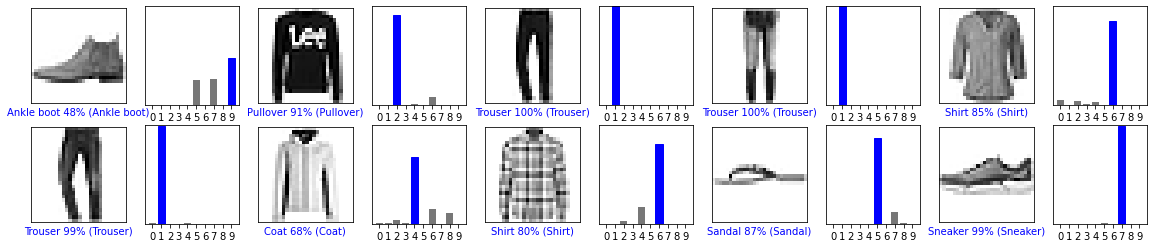

Modelo 2


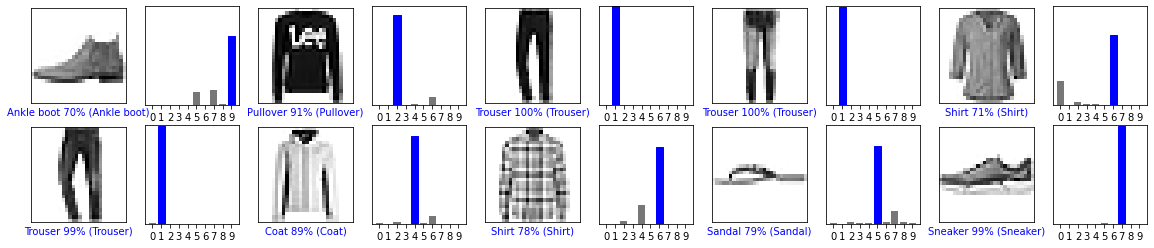

Modelo 2_2


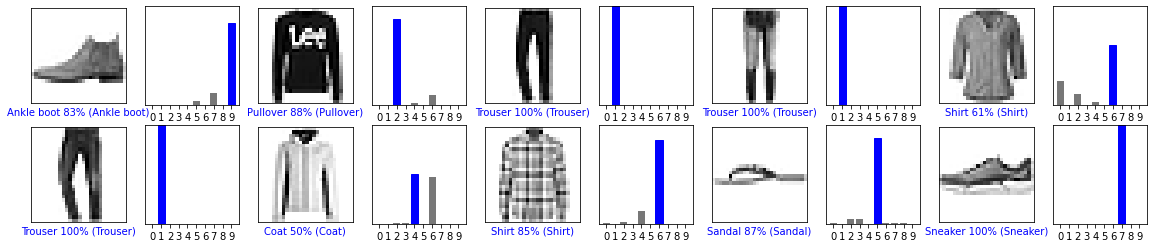

Modelo 3


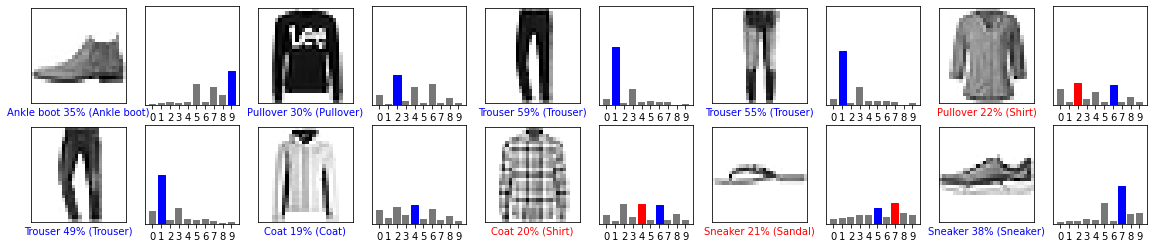

Modelo 4


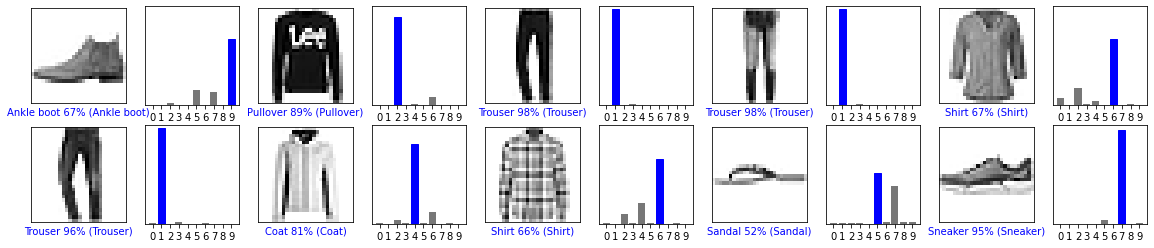

Modelo 5


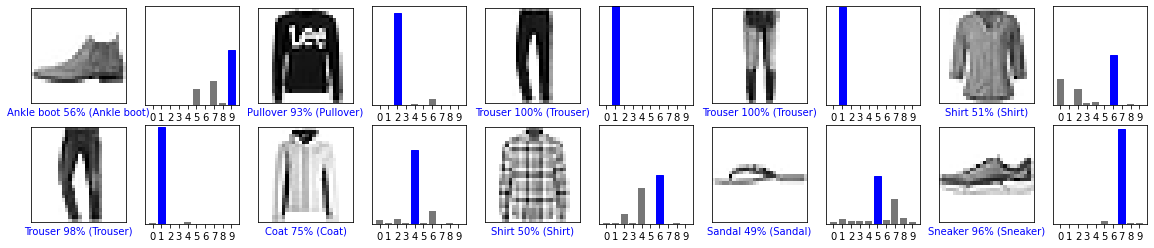

Modelo 6


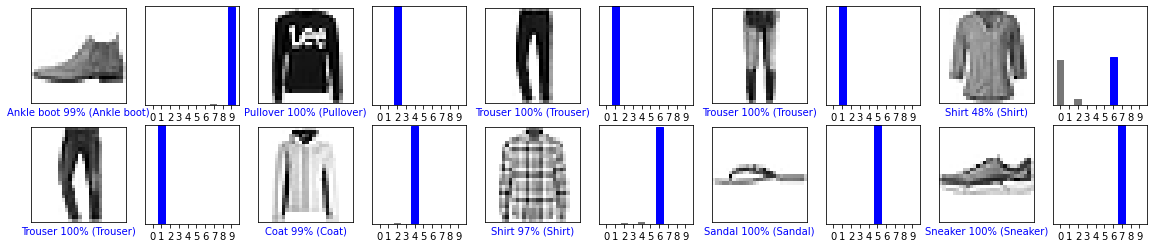

Modelo 7


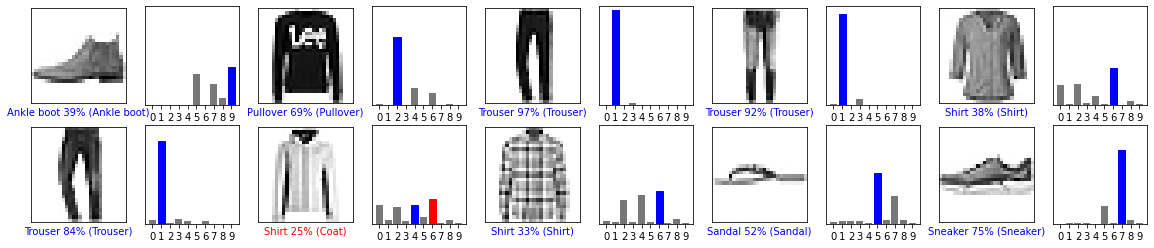

Modelo 7_2


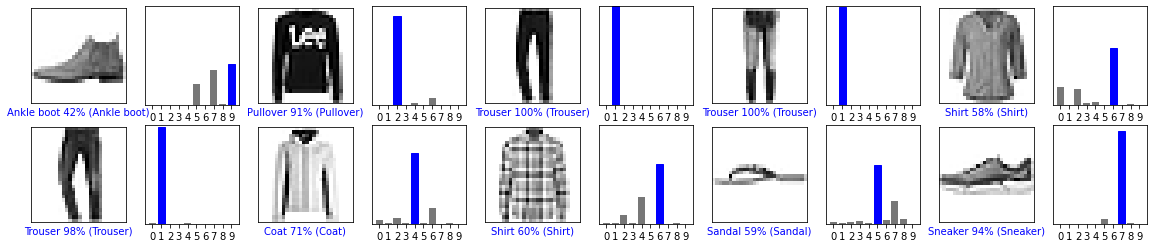

Modelo 8


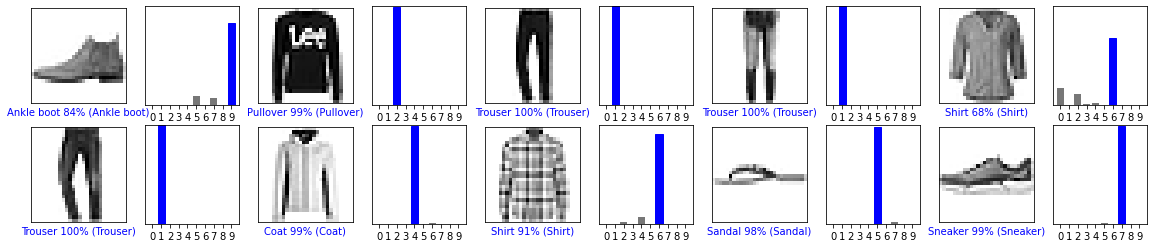

In [ ]:
# iniciamos el tamaño de la matriz para imprimir
num_rows = 2
num_cols = 5
num_images = num_rows*num_cols

# Cambiamos los datos para que tengan la forma necesaria
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Graficamos el comportamiento del modelo 1
print("Modelo 1")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions1, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions1, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 2
print("Modelo 2")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions2, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 2_2
print("Modelo 2_2")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions2_2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions2_2, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 3
print("Modelo 3")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions3, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions3, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 4
print("Modelo 4")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions4, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions4, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 5
print("Modelo 5")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions5, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions5, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 6
print("Modelo 6")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions6, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions6, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 7
print("Modelo 7")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions7, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions7, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 7_2
print("Modelo 7_2")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions7_2, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions7_2, test_labels)
plt.show()

# Graficamos el comportamiento del modelo 8
print("Modelo 8")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions8, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions8, test_labels)
plt.show()

Reflexion resultados

# 7. Mejora de el modelo


In [ ]:
# Volvemos a cargar y transformar los datos para que tengan la forma necesaria para el entrenamiento
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

# Construimos el modelo
network9 = models.Sequential()
network9.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
network9.add(layers.Dense(10, activation='softmax'))
network9.summary()

# Compilamos el modelo
network9.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

# Entrenamos el modelo
network9.fit(train_images, train_labels, epochs=5, batch_size=128)

# Testeamos el modelo
test_loss, test_acc = network9.evaluate(test_images, test_labels)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.5490 - accuracy: 0.8107
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.4054 - accuracy: 0.8580
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3690 - accuracy: 0.8681
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.3388 - accuracy: 0.8789
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3691 - accuracy: 0.8676


In [ ]:
# Testeamos el modelo
test_loss, test_acc = network9.evaluate(test_images, test_labels)

Para tener una mejor idea del funcionamiento del modelo generaremos tambien la matriz de confusion de este.

In [ ]:
# Funcion para representar la matriz de confusión 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

#importamos librerias necesarias para calcular la matriz de confusión
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Obtenemos las salidas del modelo para las imagenes de test
Y_pred = network9.predict(test_images)
# Obtenemos el label correspondiente a la salida del modelo
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Obtenemos el label correspondiente a la imagen
Y_true = np.argmax(test_labels, axis = 1) 
# Generamos la matriz de confusión
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# Representamos la matriz de confusión
plot_confusion_matrix(confusion_mtx, classes = class_names)

En el caso de nuestro sistema de redes neuronales no es verdaderamente importante la matriz de confusión ya que no hay una distincion real entre falsos positivos o falsos negativos. Esto se debe a que no partimos de una hipotesis a refutar o confirmar.

Cabe destacar que el modelo se comporta de muy buena manera para prendas de ropa diferentes casi no teniendo ningun error. Sin embargo para prendas de ropa mas parecidas como camisetas y camisas si tiene mas problemas. Estos problemas son bidireccionales ya que se puede observar que la matriz esta bastante cerca de ser simetrica.

Explicacion de optimizador y funcion de perdida
Reflexiones respecto al resultado